21:02:33 - cmdstanpy - INFO - Chain [1] start processing
21:02:34 - cmdstanpy - INFO - Chain [1] done processing


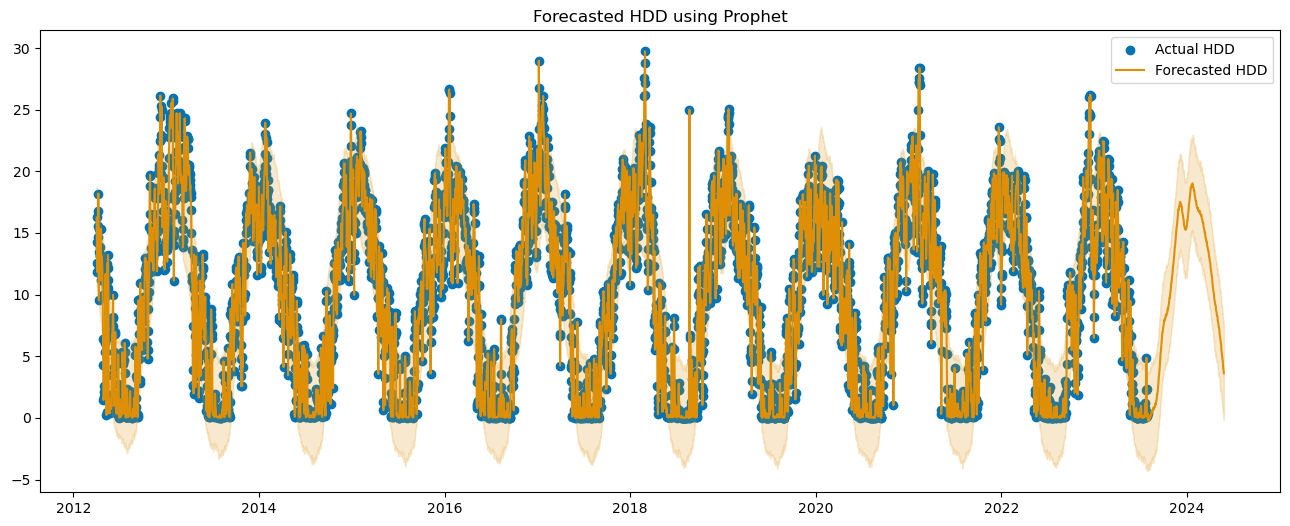

21:02:34 - cmdstanpy - INFO - Chain [1] start processing
21:02:35 - cmdstanpy - INFO - Chain [1] done processing


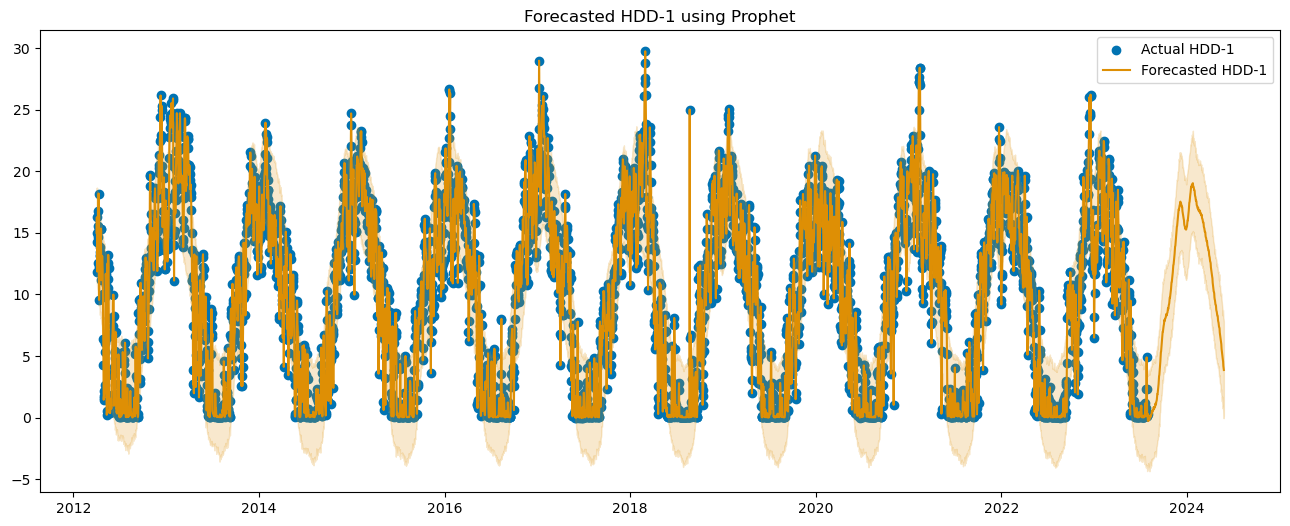

21:02:35 - cmdstanpy - INFO - Chain [1] start processing
21:02:36 - cmdstanpy - INFO - Chain [1] done processing


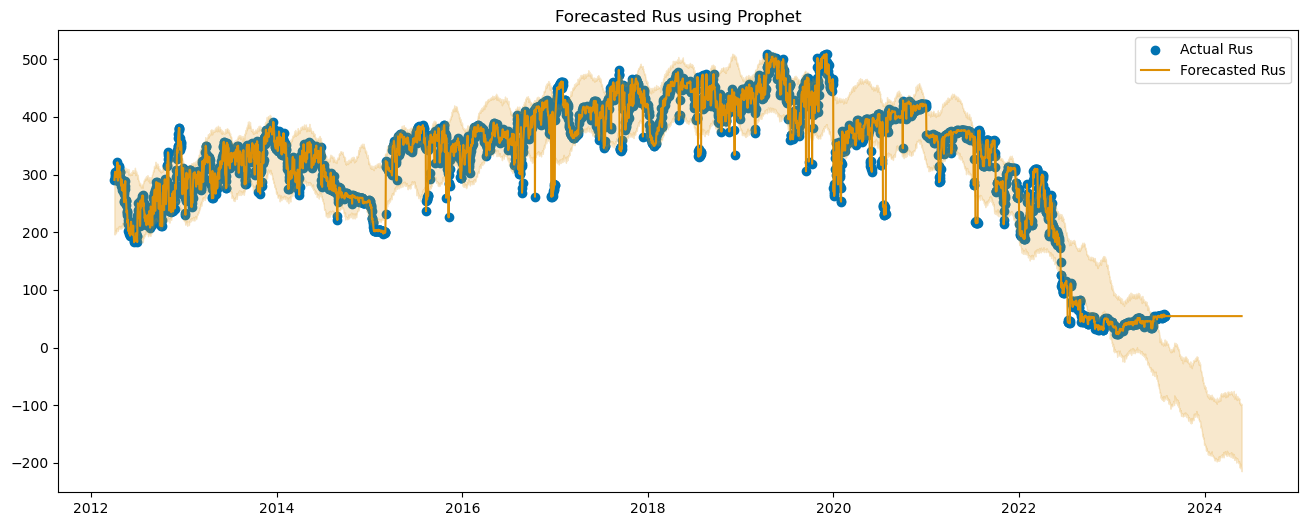

21:02:37 - cmdstanpy - INFO - Chain [1] start processing
21:02:37 - cmdstanpy - INFO - Chain [1] done processing


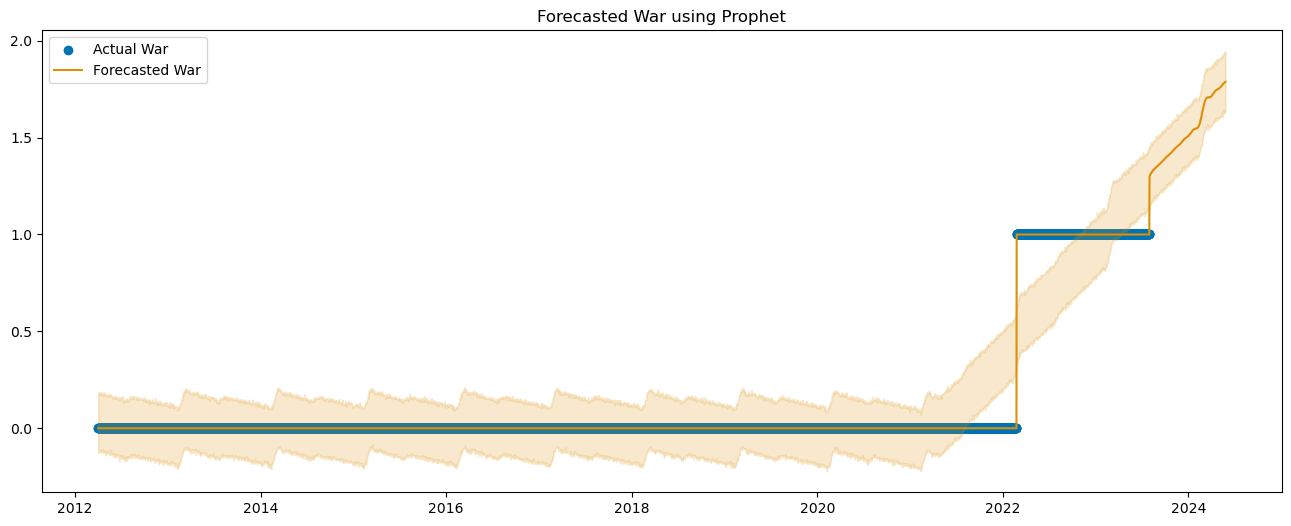

21:02:38 - cmdstanpy - INFO - Chain [1] start processing
21:02:39 - cmdstanpy - INFO - Chain [1] done processing


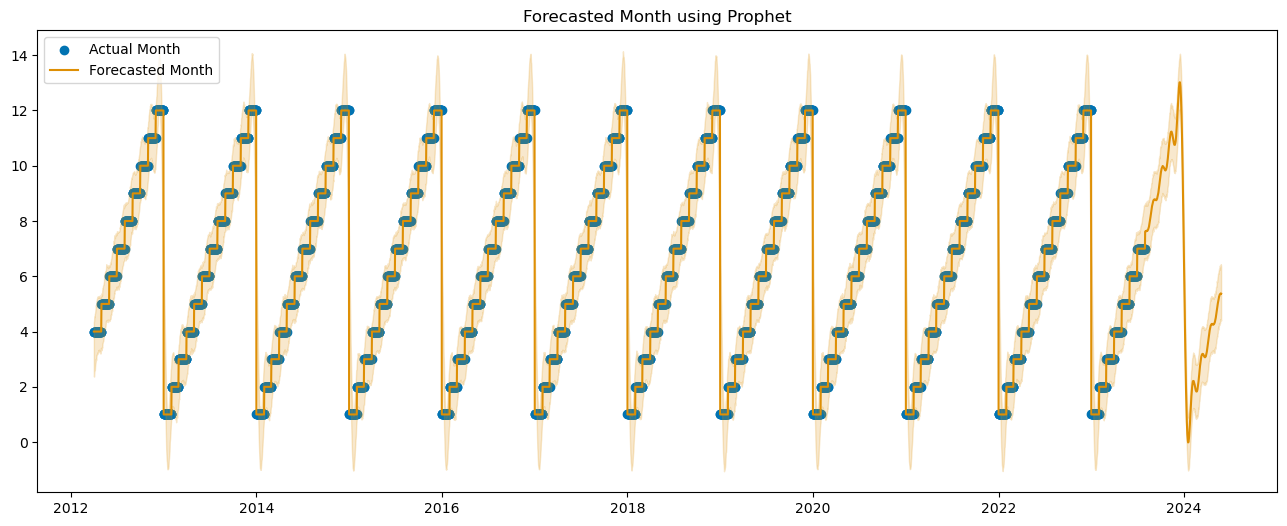

21:02:39 - cmdstanpy - INFO - Chain [1] start processing
21:02:40 - cmdstanpy - INFO - Chain [1] done processing


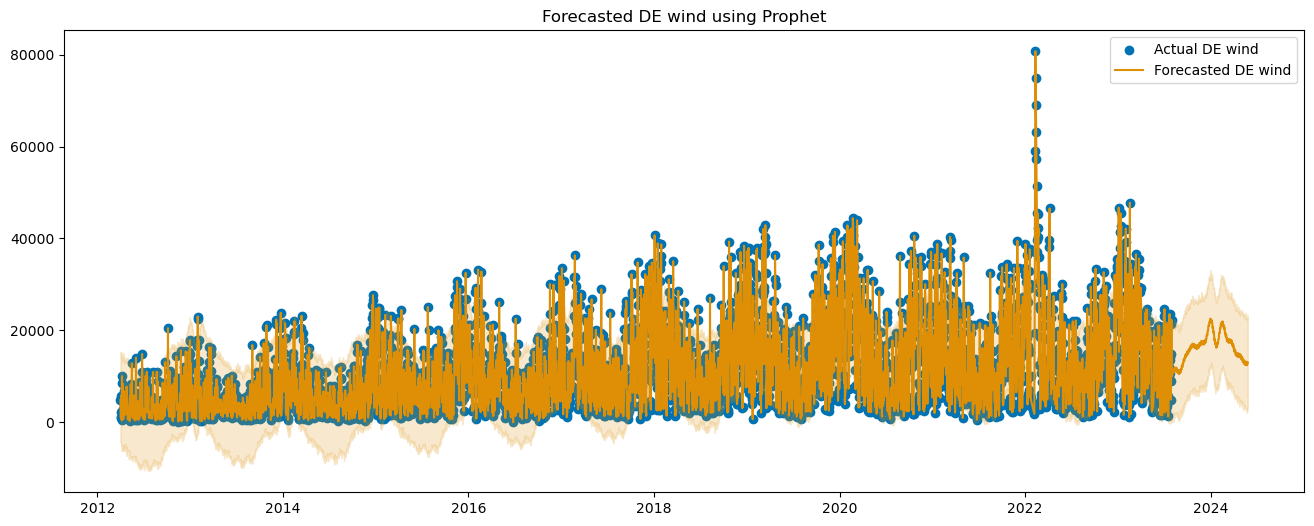

21:02:40 - cmdstanpy - INFO - Chain [1] start processing
21:02:41 - cmdstanpy - INFO - Chain [1] done processing


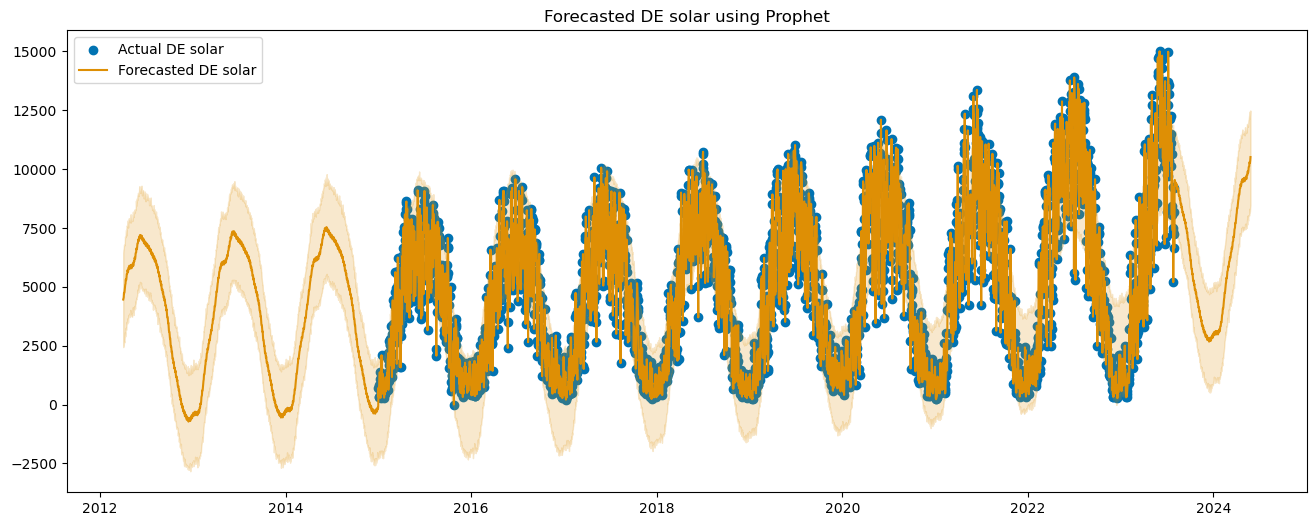

21:02:41 - cmdstanpy - INFO - Chain [1] start processing
21:02:42 - cmdstanpy - INFO - Chain [1] done processing


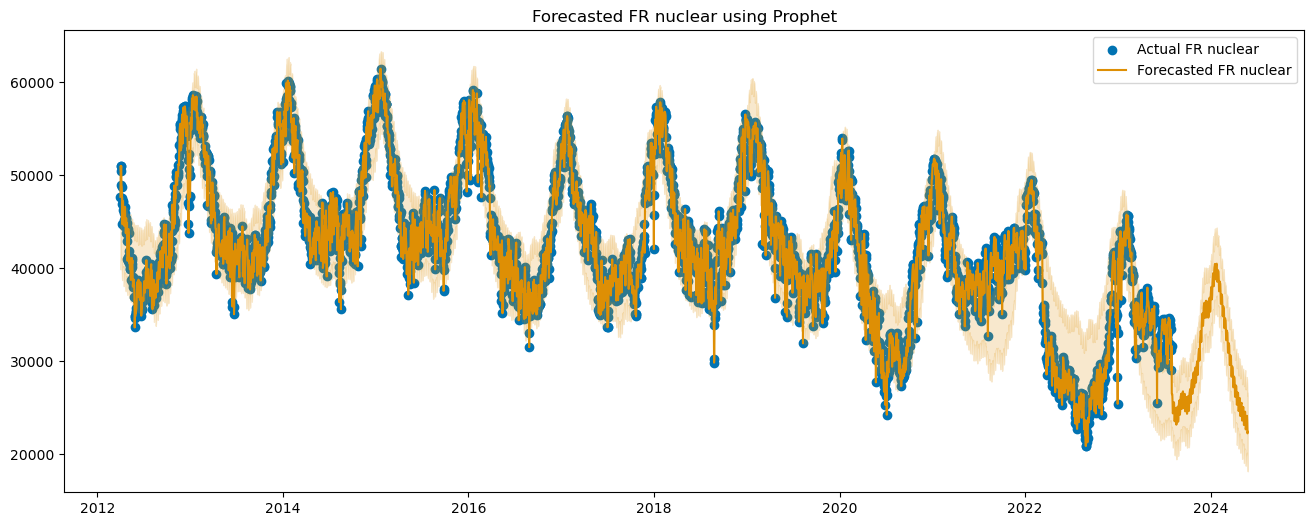

21:02:43 - cmdstanpy - INFO - Chain [1] start processing
21:02:45 - cmdstanpy - INFO - Chain [1] done processing


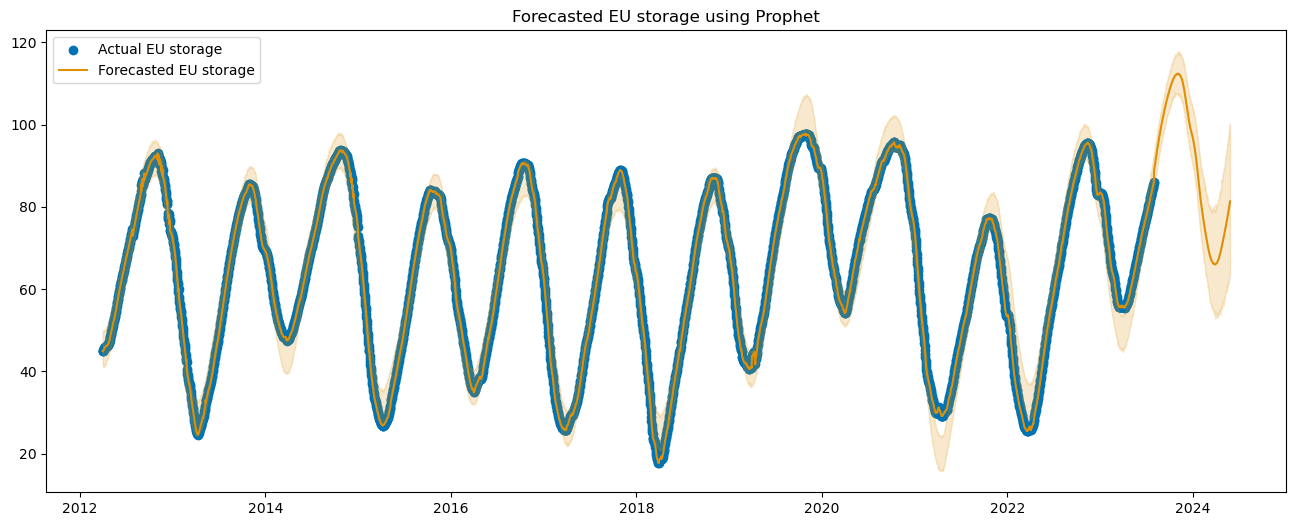

21:02:46 - cmdstanpy - INFO - Chain [1] start processing
21:02:47 - cmdstanpy - INFO - Chain [1] done processing


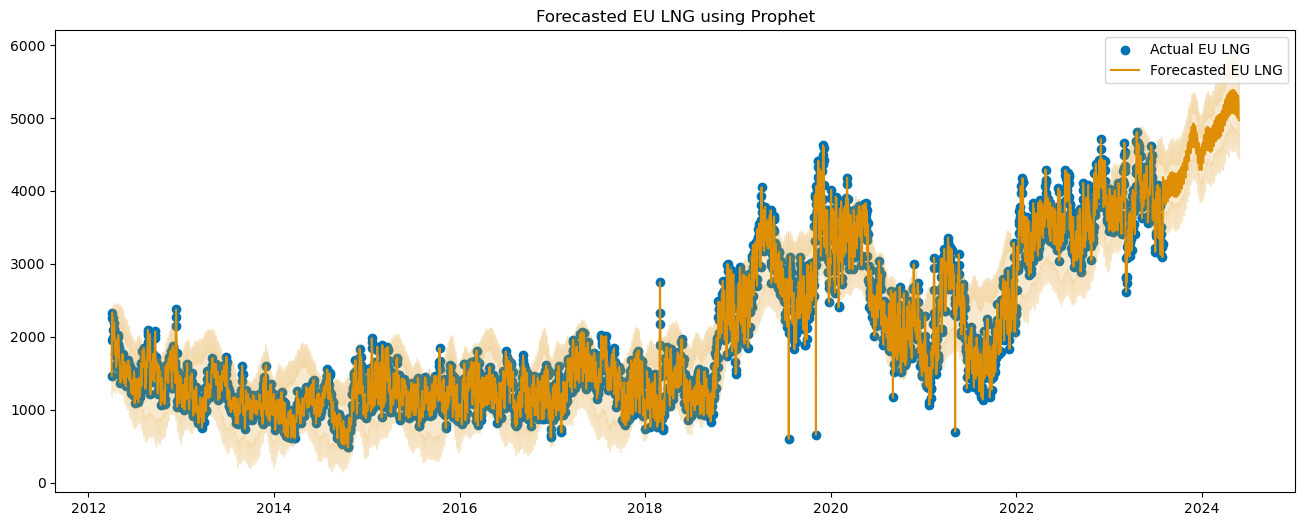

21:02:48 - cmdstanpy - INFO - Chain [1] start processing
21:02:48 - cmdstanpy - INFO - Chain [1] done processing


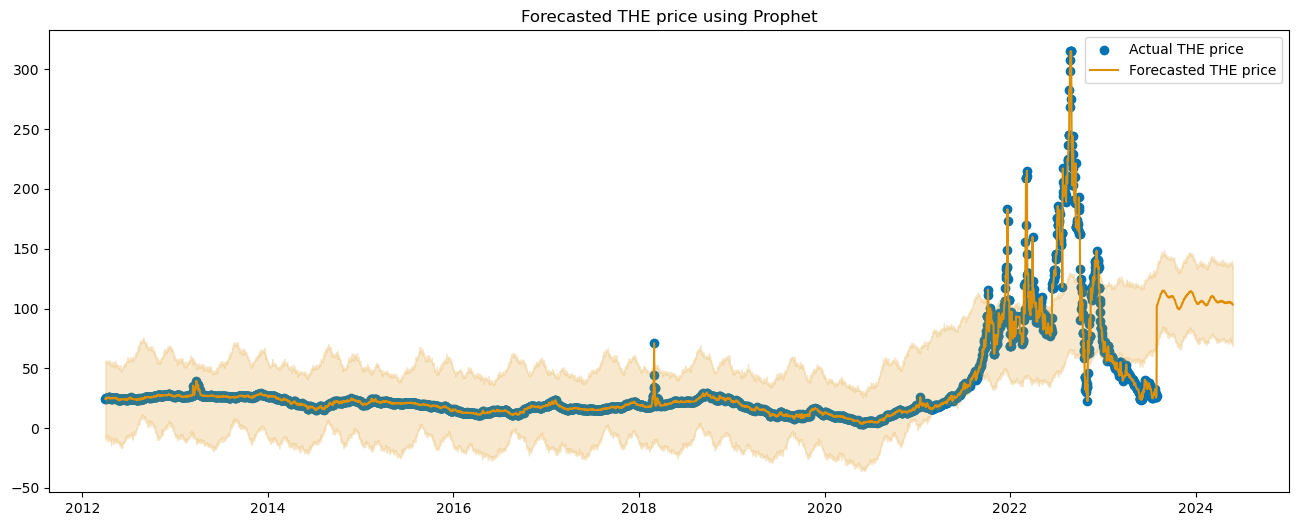

21:02:49 - cmdstanpy - INFO - Chain [1] start processing
21:02:52 - cmdstanpy - INFO - Chain [1] done processing


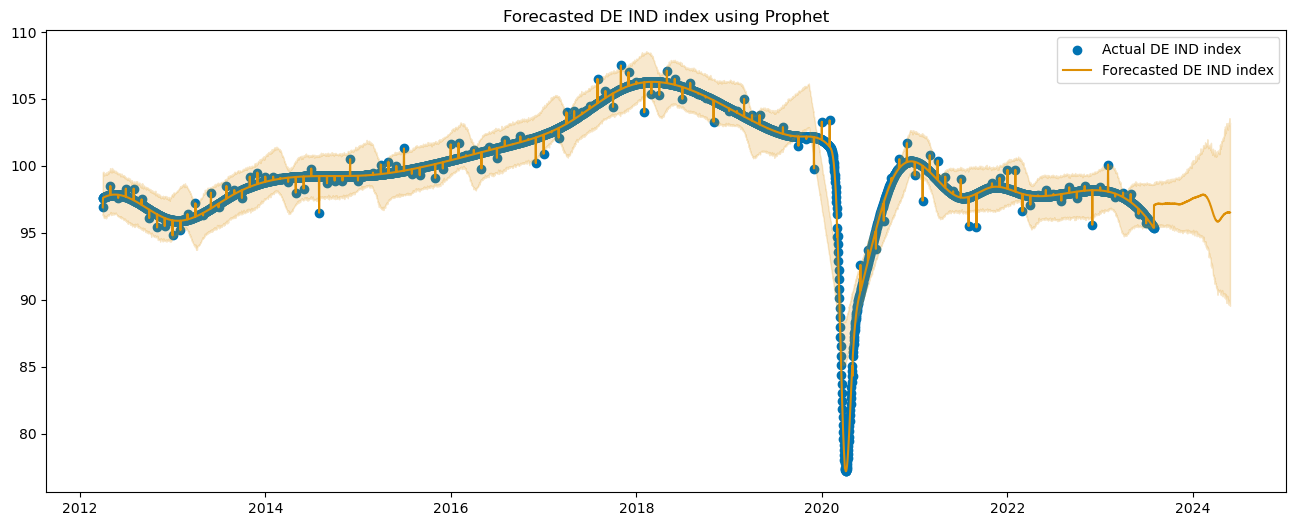

21:02:52 - cmdstanpy - INFO - Chain [1] start processing
21:02:53 - cmdstanpy - INFO - Chain [1] done processing


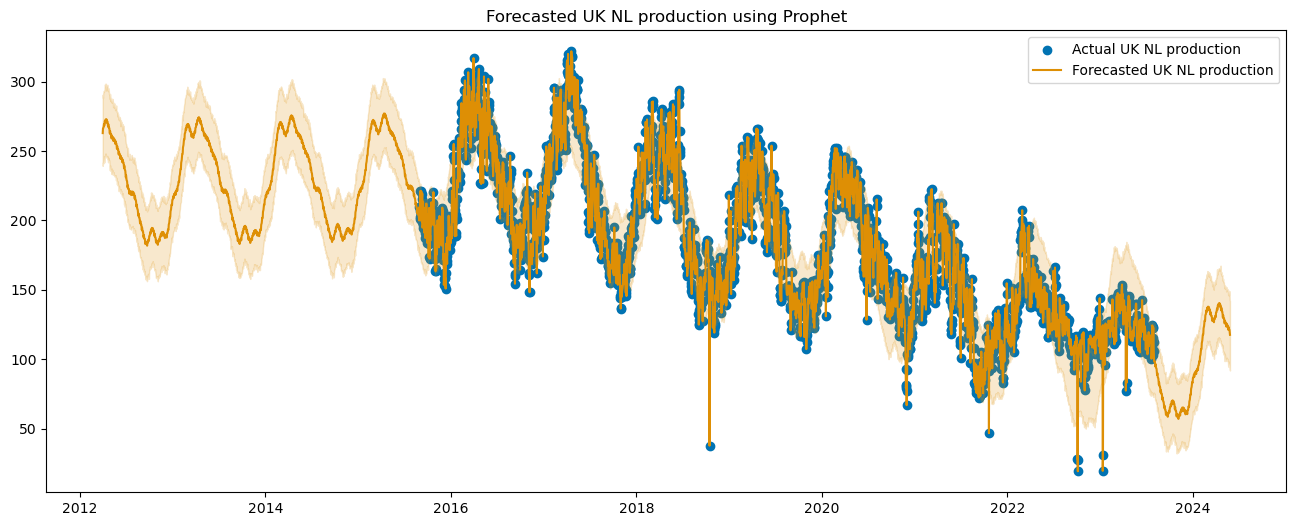

21:02:53 - cmdstanpy - INFO - Chain [1] start processing
21:02:54 - cmdstanpy - INFO - Chain [1] done processing


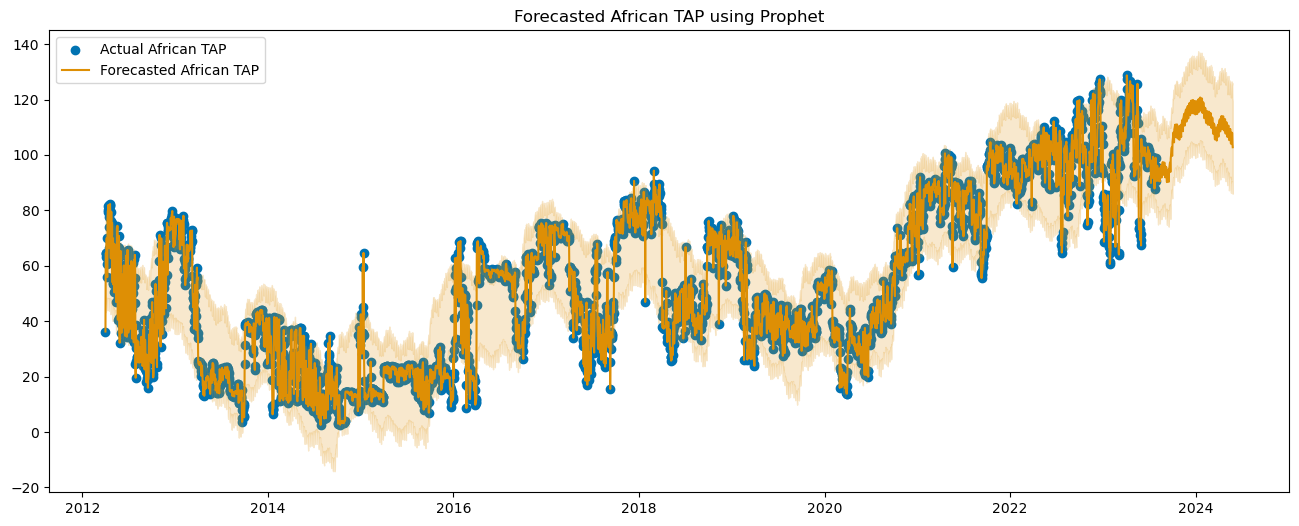

21:02:55 - cmdstanpy - INFO - Chain [1] start processing
21:02:56 - cmdstanpy - INFO - Chain [1] done processing


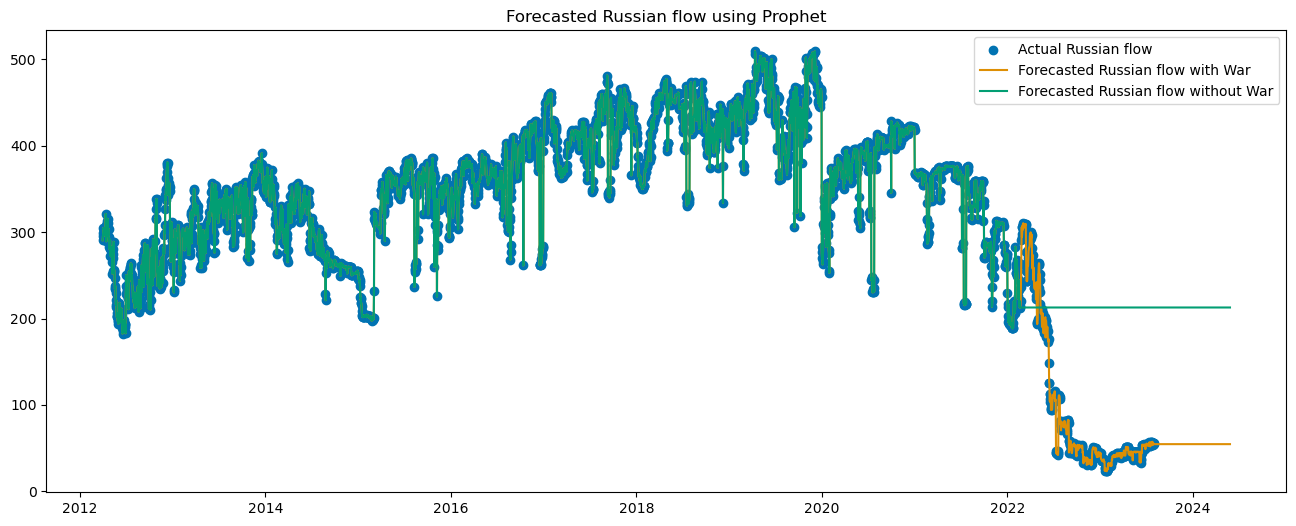

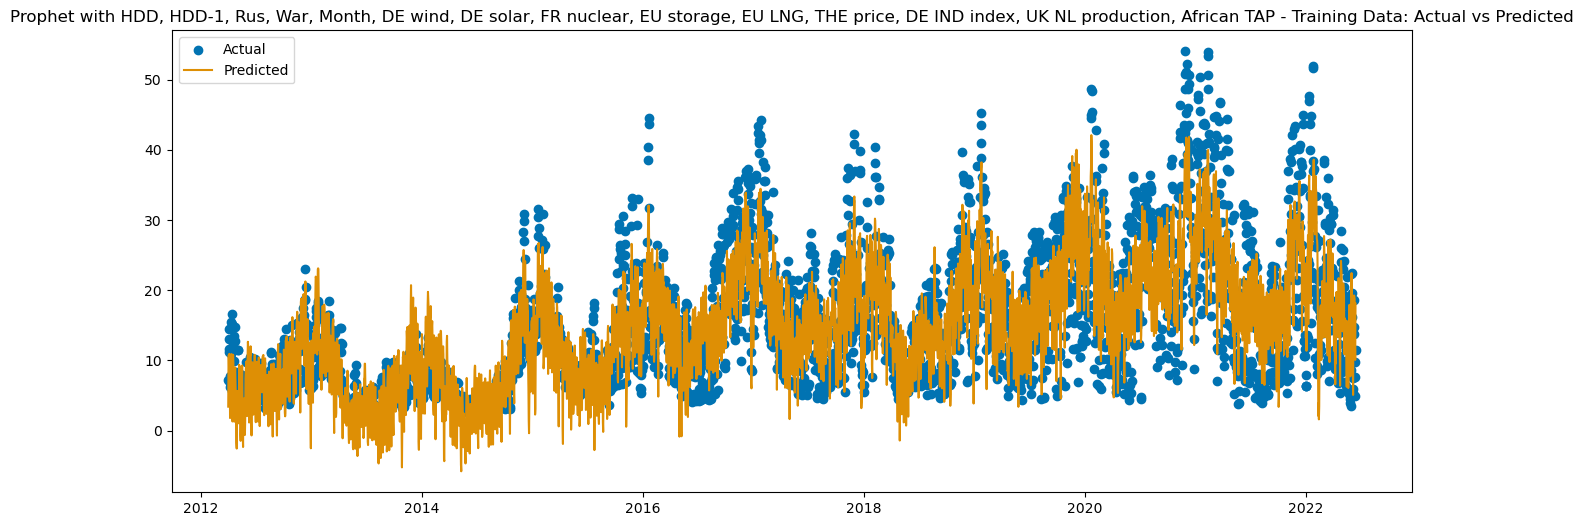

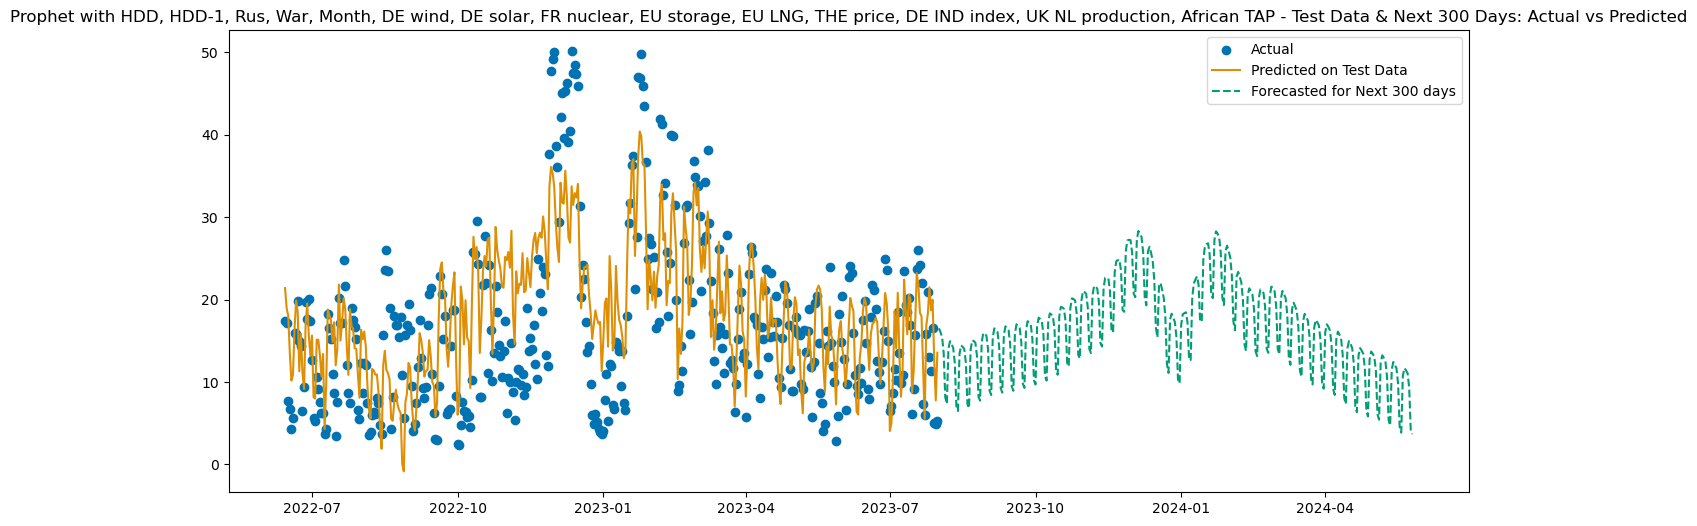

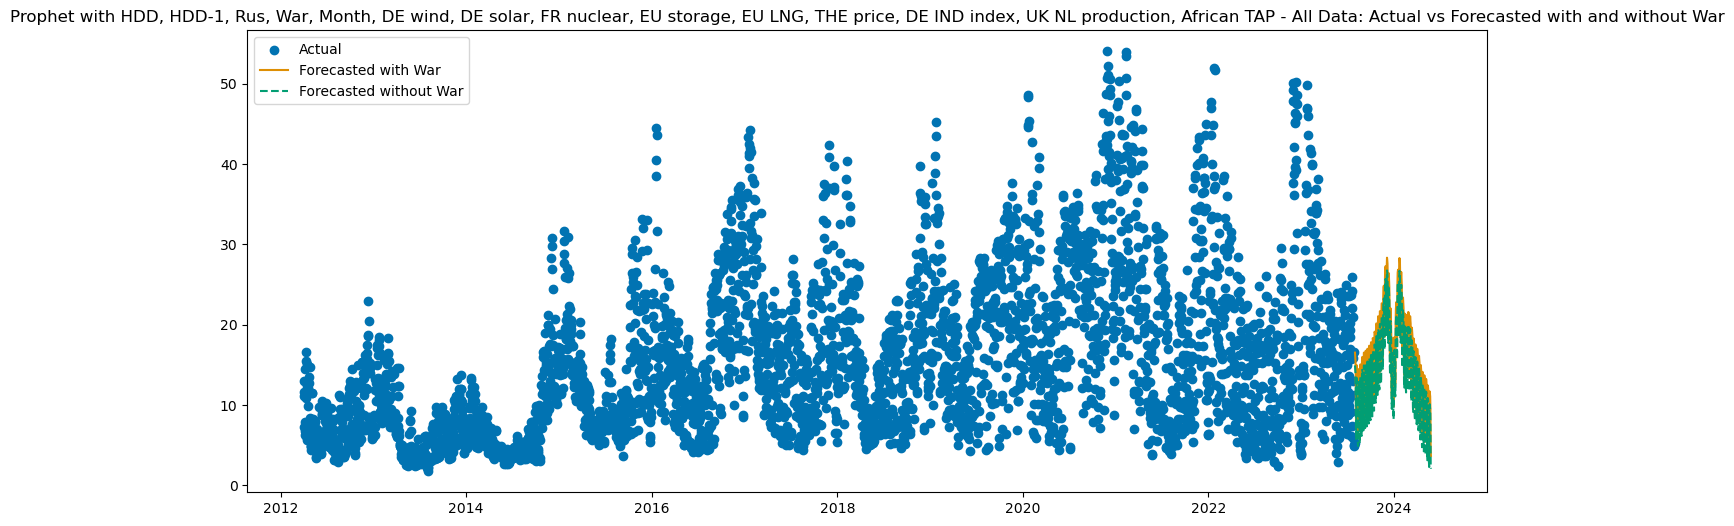

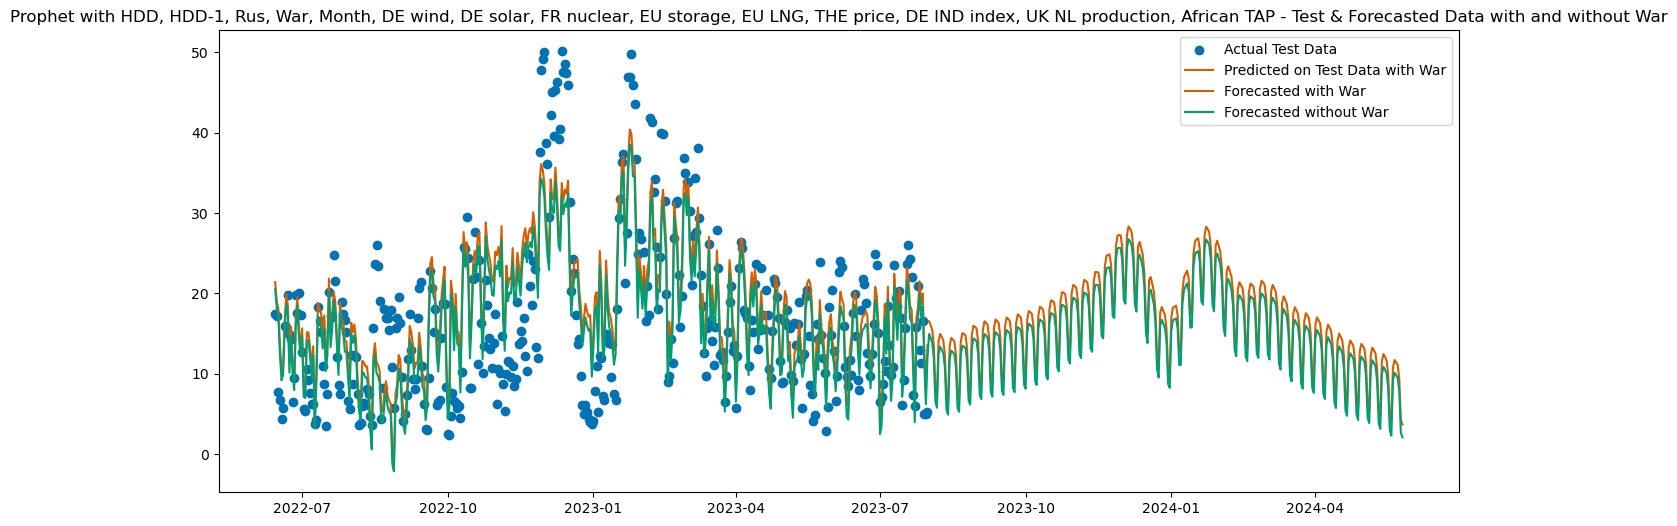

Evaluation based on variables: HDD, HDD-1, Rus, War, Month, DE wind, DE solar, FR nuclear, EU storage, EU LNG, THE price, DE IND index, UK NL production, African TAP
Training MAPE: 34.2670%
Testing MAPE: 46.6066%
Training RMSE: 4.6964
Testing RMSE: 6.5147
Training R2 score: 0.7683
Testing R2 score: 0.6055
Training MAE: 3.6676
Testing MAE: 5.1347


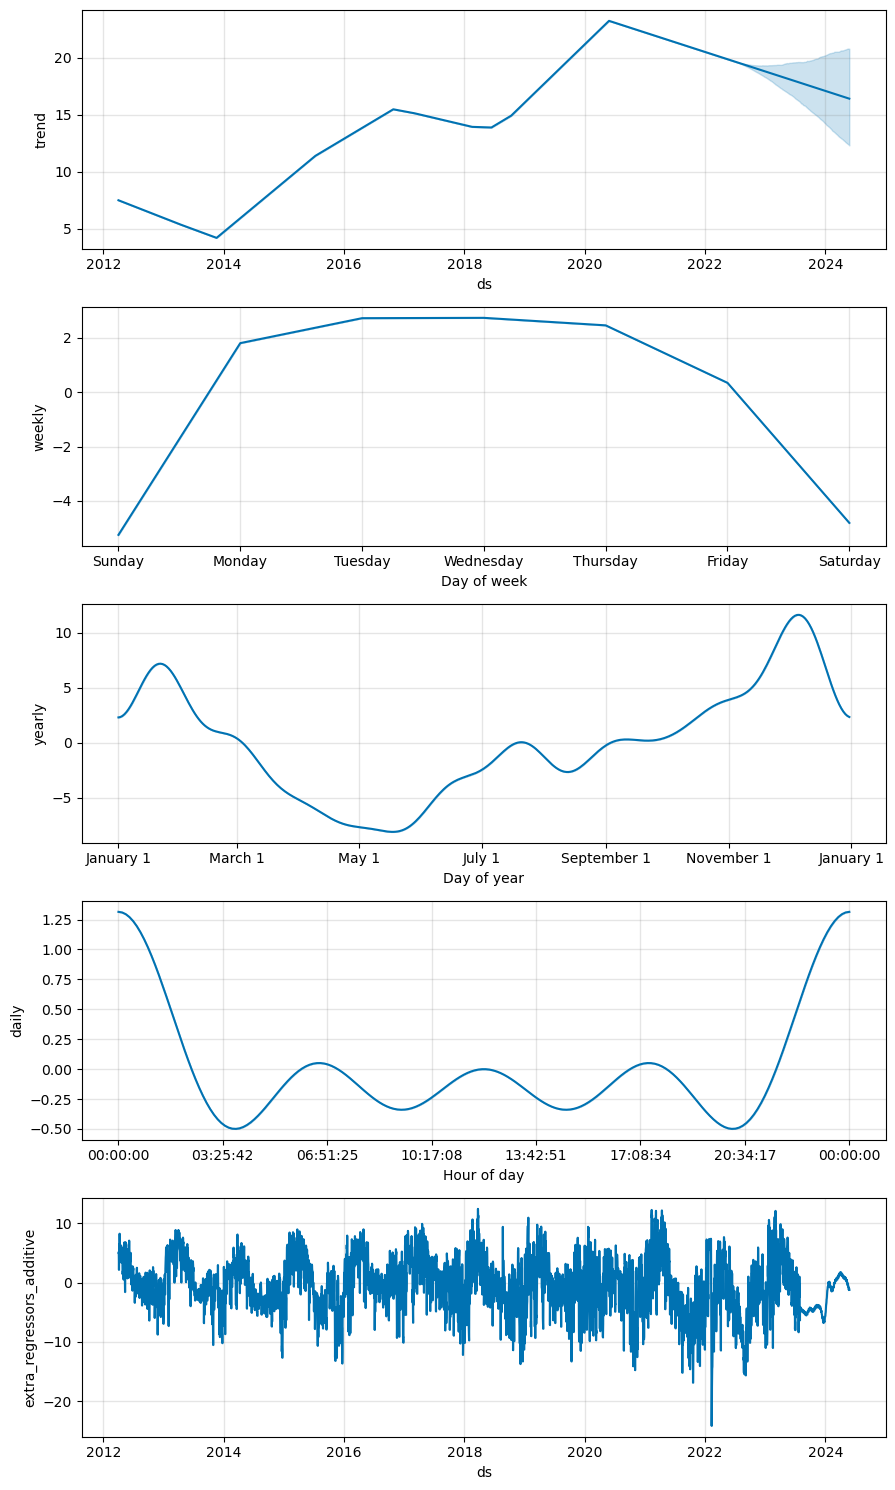

  0%|          | 0/15 [00:00<?, ?it/s]

21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:02:59 - cmdstanpy - INFO - Chain [1] done processing
21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:02:59 - cmdstanpy - INFO - Chain [1] done processing
21:02:59 - cmdstanpy - INFO - Chain [1] start processing
21:03:00 - cmdstanpy - INFO - Chain [1] done processing
21:03:00 - cmdstanpy - INFO - Chain [1] start processing
21:03:00 - cmdstanpy - INFO - Chain [1] done processing
21:03:00 - cmdstanpy - INFO - Chain [1] start processing
21:03:00 - cmdstanpy - INFO - Chain [1] done processing
21:03:01 - cmdstanpy - INFO - Chain [1] start processing
21:03:01 - cmdstanpy - INFO - Chain [1] done processing
21:03:01 - cmdstanpy - INFO - Chain [1] start processing
21:03:01 - cmdstanpy - INFO - Chain [1] done processing
21:03:02 - cmdstanpy - INFO - Chain [1] start processing
21:03:02 - cmdstanpy - INFO - Chain [1] done processing
21:03:02 - cmdstanpy - INFO - Chain [1] start processing
21:03:03 - cmdstanpy - INFO - Chain [1]

  horizon        mse      rmse       mae      mape     mdape     smape  \
0 37 days  30.184325  5.494026  4.305215  0.276006  0.202671  0.270280   
1 38 days  30.534897  5.525839  4.325170  0.273641  0.202760  0.268854   
2 39 days  30.927783  5.561275  4.364706  0.275176  0.203271  0.270024   
3 40 days  30.598603  5.531600  4.360701  0.277621  0.204497  0.271344   
4 41 days  30.452282  5.518359  4.364622  0.281278  0.204349  0.275112   

   coverage  
0  0.540646  
1  0.540402  
2  0.535161  
3  0.529677  
4  0.525168  


/var/folders/vd/7gcd_vrj2nb1qm1dm3sczg_h0000gn/T/ipykernel_19593/2304822627.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = pd.to_datetime(test['Date'])


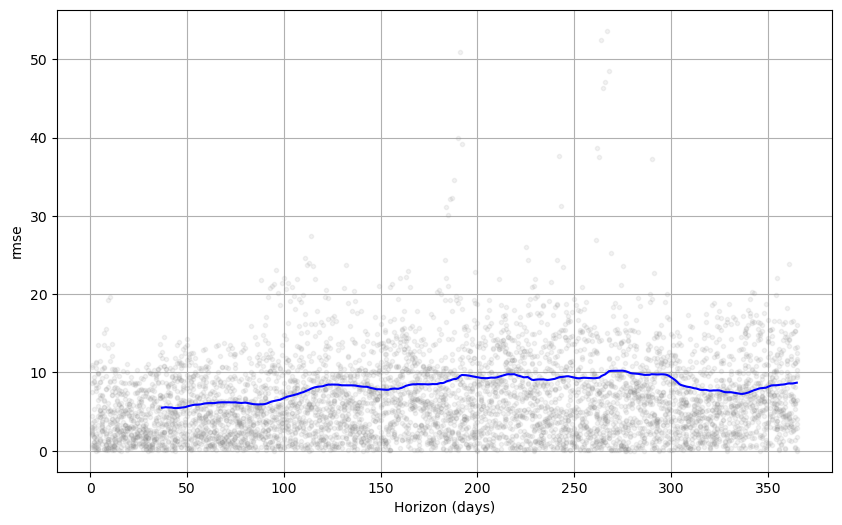

In [47]:
#Prophet with varibles which are flexible to choose
import pandas as pd
import numpy as np
import datetime
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import holidays


# Load the data and initial parameters
test_ratio = 0.1
nr_lastdays = 300
ngd_data = pd.read_csv('daily_NGD.csv', delimiter=',')
ngd_data['Date'] = pd.to_datetime(ngd_data['Date'])

type_ngd = 'GTP' # Choose between 'NGD', 'LDZ', 'IND', 'GTP'

variables_dict = {
    'NGD': ['HDD', 'HDD-1', 'Rus','War','Workday','Month','DE IND index'],
    'LDZ': ['HDD', 'HDD-1', 'Rus','War','Month','Workday','DE wind','DE solar','FR nuclear'],
    'IND': ['HDD', 'HDD-1', 'Rus','War','Month','Workday','DE wind','DE solar','DE IND index', 'FR nuclear','THE price'],
    'GTP': ['HDD', 'HDD-1', 'Rus','War','Month','DE wind','DE solar','FR nuclear','EU storage','EU LNG','THE price','DE IND index','UK NL production','African TAP']
}

if type_ngd not in variables_dict:
    raise ValueError("Invalid gas demand type selected!")

explanatory_vars = variables_dict[type_ngd]  # Use the dynamically created list based on selected 'type_ngd'

# Drop rows with NaN values in 'HDD' and 'Rus'
ngd_data.dropna(subset=[type_ngd, 'HDD', 'Rus'], inplace=True)

# Train-test split
test_start_dt = round(len(ngd_data) * (1 - test_ratio)) + 1
train = ngd_data.iloc[:test_start_dt]
test = ngd_data.iloc[test_start_dt:]

# Define the variables to consider
variables_to_consider = explanatory_vars  # This now comes from the new code block
variables_string = ', '.join(variables_to_consider)  # For printing purposes

# Extract the actual 'Rus' flow value on 20th February 2022
rus_value_on_20_feb_2022 = ngd_data.loc[ngd_data['Date'] == '2022-02-20', 'Rus'].values[0]

# Forecast HDD, Rus, etc. using Prophet if they are in the list
forecasted_dataframes = {}
colors = sns.color_palette("colorblind")
for variable in variables_to_consider:
    var_data = ngd_data[['Date', variable]].rename(columns={'Date': 'ds', variable: 'y'})
    var_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    var_model.fit(var_data)
    
    var_future = var_model.make_future_dataframe(periods=nr_lastdays)
    var_forecast = var_model.predict(var_future)
    
    # Ensure that for historical data, the forecasted value coincides with the actual data
    var_forecast = pd.merge(var_forecast, var_data, on='ds', how='left')
    mask = ~var_forecast['y'].isna()
    var_forecast.loc[mask, 'yhat'] = var_forecast.loc[mask, 'y']

    
# For Russian flow, keep historical as actual and set future to the last observed value
    if variable == 'Rus':
        last_actual_rus = var_data['y'].iloc[-1]
        last_date_in_actual = var_data['ds'].iloc[-1]
        
        # Set future forecasted values (dates after the last_date_in_actual) to last_actual_rus
        var_forecast.loc[var_forecast['ds'] > last_date_in_actual, 'yhat'] = last_actual_rus
    
    
    forecasted_dataframes[variable] = var_forecast[['ds', 'yhat']]
        
    # Dynamic Plotting of forecasted regressors
    plt.figure(figsize=(16, 6))
    plt.scatter(ngd_data['Date'], ngd_data[variable], color=colors[0], label=f"Actual {variable}")
    plt.plot(var_future['ds'], var_forecast['yhat'], color=colors[1], label=f"Forecasted {variable}")
    plt.fill_between(var_future['ds'], var_forecast['yhat_lower'], var_forecast['yhat_upper'], color=colors[1], alpha=0.2)
    plt.title(f"Forecasted {variable} using Prophet")
    plt.legend()
    plt.show()

# Create the gas demand Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
for variable in variables_to_consider:
    if variable in forecasted_dataframes:
        model.add_regressor(f'forecasted_{variable}')
    else:
        model.add_regressor(variable)

# Prepare the train dataset with regressors
train_with_regressors = train.copy()
for variable, forecasted_df in forecasted_dataframes.items():
    train_with_regressors = train_with_regressors.merge(forecasted_df[['ds', 'yhat']], left_on='Date', right_on='ds', how='left').rename(columns={'yhat': f'forecasted_{variable}'}).drop(columns=['ds'])

# Ensure that all expected regressors are present
for variable in variables_to_consider:
    if f'forecasted_{variable}' not in train_with_regressors.columns and variable not in train_with_regressors.columns:
        raise ValueError(f"Missing regressor: {variable}")

train_with_regressors = train_with_regressors[['Date'] + [f'forecasted_{variable}' for variable in variables_to_consider if f'forecasted_{variable}' in train_with_regressors.columns] + [variable for variable in variables_to_consider if variable in train_with_regressors.columns] + [type_ngd]]
train_with_regressors = train_with_regressors.rename(columns={type_ngd: 'y', 'Date': 'ds'})

model.fit(train_with_regressors)

# Define the forecast length and create the future dataframe
forecast_length = len(test) + nr_lastdays  # Include extra days for forecasting
future = model.make_future_dataframe(periods=forecast_length)

# Start populating the future dataframe with regressors
for variable, forecasted_df in forecasted_dataframes.items():
    future = future.merge(forecasted_df.rename(columns={"yhat": f"forecasted_{variable}"}), on='ds', how='left')
    
# If Workday is in the list, calculate it for the future
if 'Workday' in variables_to_consider:
    # Get the years present in the 'future' dataframe
    years = future['ds'].dt.year.unique()
    
    # Generate German holidays for the relevant years
    german_holidays_obj = holidays.Germany(years=years.tolist())
    german_holidays = list(german_holidays_obj.keys())

    # Calculate the 'Workday' column
    future['Workday'] = (~future['ds'].dt.weekday.isin([5, 6]) & ~future['ds'].isin(german_holidays)).astype(int)

# If War is in the list, use the last value for the future
if 'War' in variables_to_consider:
    last_war_value = ngd_data['War'].iloc[-1]
    future['War'] = last_war_value

# Predict gas demand
forecast = model.predict(future)

# Create another future dataframe with War set to zero
future_no_war = future.copy()
future_no_war['War'] = 0

future_no_war.loc[future_no_war['ds'] > '2022-02-20', 'forecasted_Rus'] = rus_value_on_20_feb_2022

# Predict gas demand using the initial future dataframe (with last historical War value)
forecast_with_war = model.predict(future)

# Predict gas demand using the future_no_war dataframe (with War set to zero)
forecast_no_war = model.predict(future_no_war)

# Plotting
colors = sns.color_palette("colorblind")

# Dynamic Plotting of forecasted regressors for two Russian flow scenarios
plt.figure(figsize=(16, 6))
plt.scatter(ngd_data['Date'], ngd_data['Rus'], color=colors[0], label=f"Actual Russian flow")
plt.plot(future['ds'], future['forecasted_Rus'], color=colors[1], label=f"Forecasted Russian flow with War")
plt.plot(future['ds'], future_no_war['forecasted_Rus'], color=colors[2], label=f"Forecasted Russian flow without War")
plt.title(f"Forecasted Russian flow using Prophet")
plt.legend()
plt.show()

# 1. Actual vs Predicted on Training Data
plt.figure(figsize=(16, 6))
plt.scatter(train['Date'], train[type_ngd], color=colors[0], label="Actual")
plt.plot(train['Date'], forecast['yhat'][:len(train)], color=colors[1], label="Predicted")
plt.title(f"Prophet with {variables_string} - Training Data: Actual vs Predicted")
plt.legend()
plt.show()

# 2. Actual vs Predicted on Test Data
plt.figure(figsize=(16, 6))
plt.scatter(test['Date'], test[type_ngd], color=colors[0], label="Actual")
plt.plot(forecast['ds'][len(train):-nr_lastdays], forecast['yhat'][len(train):-nr_lastdays], color=colors[1], label="Predicted on Test Data")
plt.plot(forecast['ds'][-nr_lastdays:], forecast['yhat'][-nr_lastdays:], color=colors[2], linestyle='--', label="Forecasted for Next 300 days")
plt.title(f"Prophet with {variables_string} - Test Data & Next 300 Days: Actual vs Predicted")
plt.legend()

# 3. Actual, Predicted, and Forecasted on All Data (with and without War)
plt.figure(figsize=(16, 6))
plt.scatter(ngd_data['Date'], ngd_data[type_ngd], color=colors[0], label="Actual")
plt.plot(future['ds'][len(train) + len(test):], forecast_with_war['yhat'][len(train) + len(test):], color=colors[1], label="Forecasted with War")
plt.plot(future_no_war['ds'][len(train) + len(test):], forecast_no_war['yhat'][len(train) + len(test):], color=colors[2], linestyle='--', label="Forecasted without War")
plt.title(f"Prophet with {variables_string} - All Data: Actual vs Forecasted with and without War")
plt.legend()
plt.show()

# 4. Actual (Test) vs Predicted & Forecasted (with and without War)
plt.figure(figsize=(16, 6))
plt.scatter(test['Date'], test[type_ngd], color=colors[0], label="Actual Test Data")
plt.plot(test['Date'], forecast_with_war['yhat'][len(train):len(train) + len(test)], color=colors[3], label="Predicted on Test Data with War")
plt.plot(future['ds'][len(train) + len(test):], forecast_with_war['yhat'][len(train) + len(test):], color=colors[3], label="Forecasted with War")
plt.plot(future_no_war['ds'][len(train):], forecast_no_war['yhat'][len(train):], color=colors[2],label="Forecasted without War")
plt.title(f"Prophet with {variables_string} - Test & Forecasted Data with and without War")
plt.legend()
plt.show()

# Evaluation

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(train[type_ngd], forecast['yhat'][:len(train)])
test_mape = mean_absolute_percentage_error(test[type_ngd], forecast['yhat'][len(train):len(train) + len(test)])
train_rmse = np.sqrt(mean_squared_error(train[type_ngd], forecast['yhat'][:len(train)]))
test_rmse = np.sqrt(mean_squared_error(test[type_ngd], forecast['yhat'][len(train):len(train) + len(test)]))
train_r2 = r2_score(train[type_ngd], forecast['yhat'][:len(train)])
test_r2 = r2_score(test[type_ngd], forecast['yhat'][len(train):len(train) + len(test)])
train_mae = mean_absolute_error(train[type_ngd], forecast['yhat'][:len(train)])
test_mae = mean_absolute_error(test[type_ngd], forecast['yhat'][len(train):len(train) + len(test)])

print(f"Evaluation based on variables: {variables_string}")
print("Training MAPE: {:.4f}%".format(train_mape))
print("Testing MAPE: {:.4f}%".format(test_mape))
print("Training RMSE: {:.4f}".format(train_rmse))
print("Testing RMSE: {:.4f}".format(test_rmse))
print("Training R2 score: {:.4f}".format(train_r2))
print("Testing R2 score: {:.4f}".format(test_r2))
print("Training MAE: {:.4f}".format(train_mae))
print("Testing MAE: {:.4f}".format(test_mae))

fig2 = model.plot_components(forecast)
plt.show()

from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Use cross-validation to assess performance over past data
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)

print(df_p.head())

# Plotting RMSE
plot_cross_validation_metric(df_cv, metric='rmse')

# Convert dates to datetime and get the monthly sums
test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date', inplace=True)

# Your forecast data needs to be sliced to match the test period
forecast_with_war['ds'] = pd.to_datetime(forecast_with_war['ds'])
forecast_no_war['ds'] = pd.to_datetime(forecast_no_war['ds'])

# Find the start and end date of the testing period
test_start = test.index.min()
test_end = test.index.max()

# Filter the forecast data to the test period
forecast_with_war = forecast_with_war[(forecast_with_war['ds'] >= test_start) & (forecast_with_war['ds'] <= test_end)]
forecast_no_war = forecast_no_war[(forecast_no_war['ds'] >= test_start) & (forecast_no_war['ds'] <= test_end)]

# Get the monthly sums for each period
monthly_actual = test[type_ngd].resample('M').sum()
monthly_forecast_with_war = forecast_with_war.set_index('ds')['yhat'].resample('M').sum()
monthly_forecast_no_war = forecast_no_war.set_index('ds')['yhat'].resample('M').sum()

# Ensure all series have the same monthly index
monthly_index = monthly_actual.index.union(monthly_forecast_with_war.index).union(monthly_forecast_no_war.index)
monthly_actual = monthly_actual.reindex(monthly_index, fill_value=0)
monthly_forecast_with_war = monthly_forecast_with_war.reindex(monthly_index, fill_value=0)
monthly_forecast_no_war = monthly_forecast_no_war.reindex(monthly_index, fill_value=0)

# Calculate the deltas
delta_with_war = monthly_actual - monthly_forecast_with_war
delta_without_war = monthly_actual - monthly_forecast_no_war



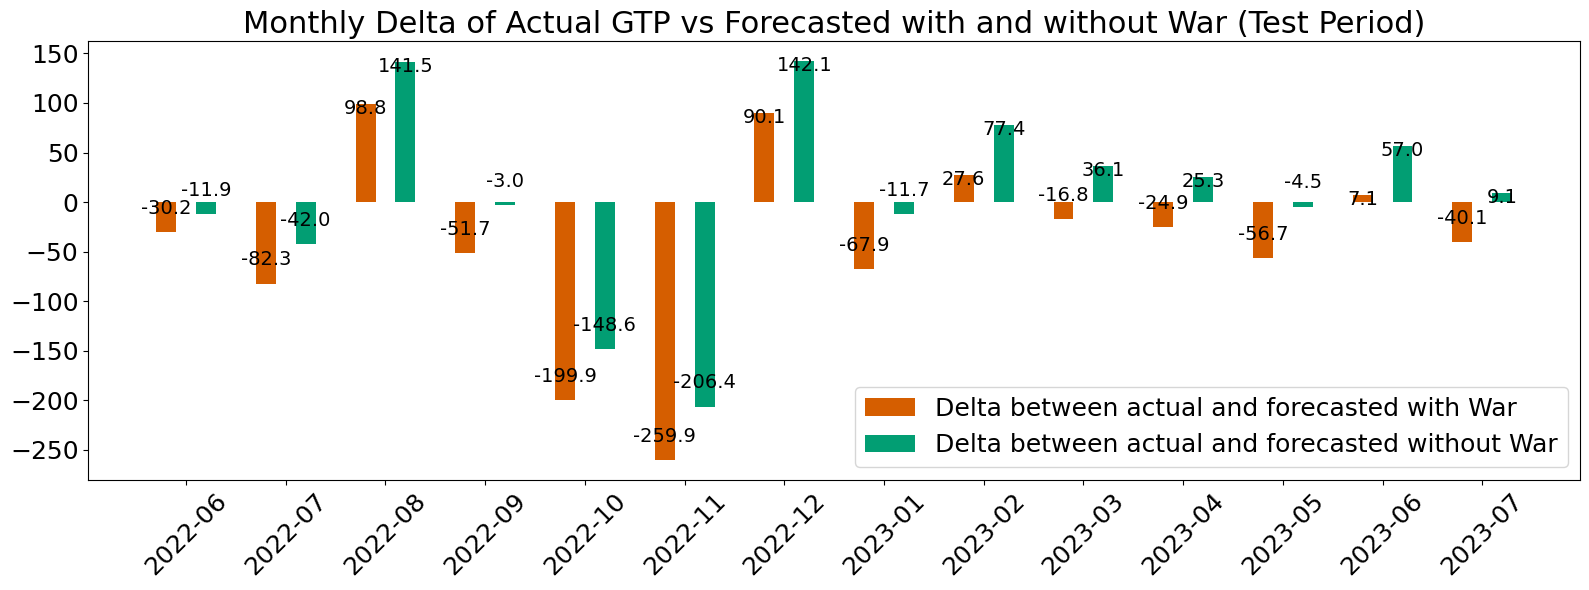

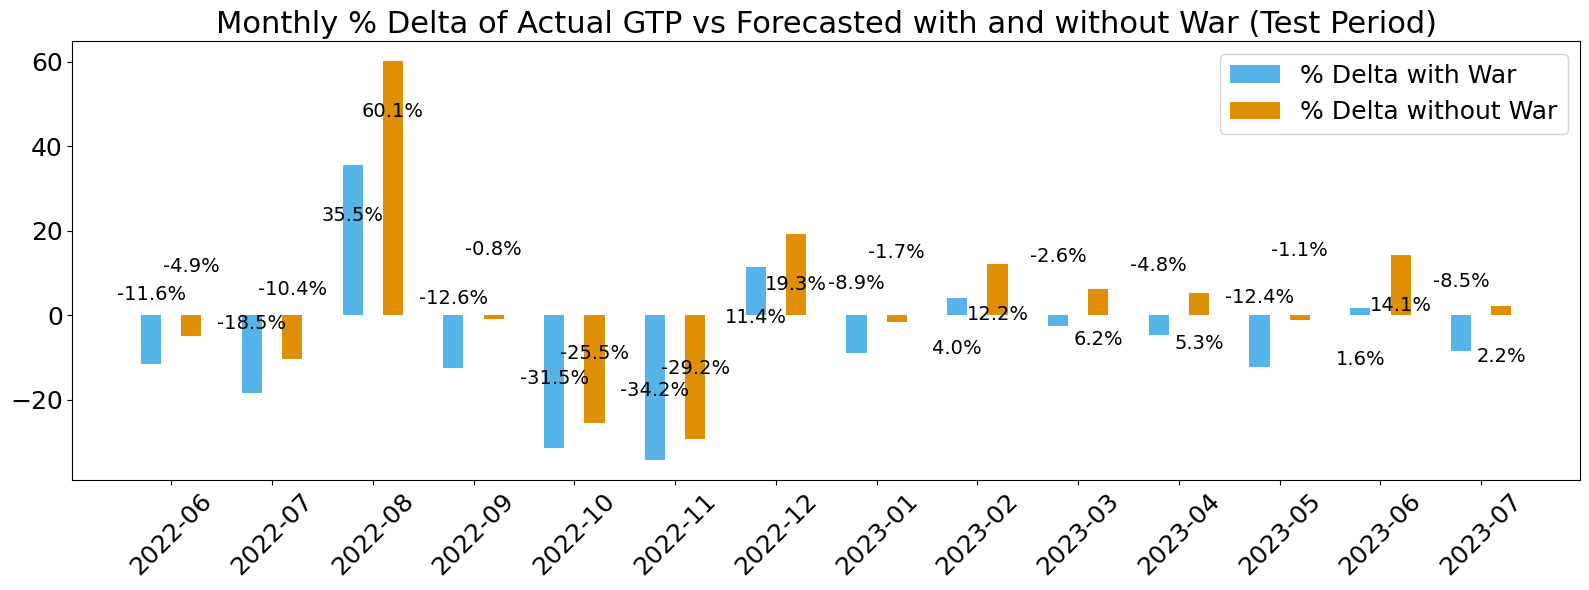

In [48]:
# Plot
plt.figure(figsize=(16, 6))
max_height = max(max(delta_with_war.values), max(delta_without_war.values))
offset = max_height * -0.1  # Dynamic offset, 3% of max bar height
x = range(len(monthly_index))

bars_with_war = plt.bar([i - 0.2 for i in x], delta_with_war.values, width=0.2, color=colors[3], label="Delta between actual and forecasted with War")
bars_without_war = plt.bar([i + 0.2 for i in x], delta_without_war.values, width=0.2, color=colors[2], label="Delta between actual and forecasted without War")

# Adding numbers on top of the bars
for bar in bars_with_war:
    height = bar.get_height()
    text_y_position = height + offset if height >= 0 else height - offset
    plt.text(bar.get_x() + bar.get_width() / 2, text_y_position, f'{height:.1f}', ha='center', va='bottom', fontsize=14)

for bar in bars_without_war:
    height = bar.get_height()
    text_y_position = height + offset if height >= 0 else height - offset
    plt.text(bar.get_x() + bar.get_width() / 2, text_y_position, f'{height:.1f}', ha='center', va='bottom', fontsize=14)

# Formatting the x-axis labels
plt.xticks(x, [month.strftime('%Y-%m') for month in monthly_index], rotation=45)
plt.xticks(fontsize=18)  # Increase font size for x-axis tick labels
plt.yticks(fontsize=18)  # Increase font size for y-axis tick labels
plt.title(f"Monthly Delta of Actual {type_ngd} vs Forecasted with and without War (Test Period)",fontsize=22)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
x = range(len(monthly_index))

# Calculate the percentage delta
percent_delta_with_war = (delta_with_war.values / monthly_forecast_with_war.values) * 100
percent_delta_without_war = (delta_without_war.values / monthly_forecast_no_war.values) * 100

bars_with_war = plt.bar([i - 0.2 for i in x], percent_delta_with_war, width=0.2, color=colors[9], label="% Delta with War")
bars_without_war = plt.bar([i + 0.2 for i in x], percent_delta_without_war, width=0.2, color=colors[1], label="% Delta without War")

# Adding percentage on top of the bars
for bar in bars_with_war:
    height = bar.get_height()
    text_y_position = height + offset if height >= 0 else height - offset
    plt.text(bar.get_x() + bar.get_width() / 2, text_y_position,  f'{height:.1f}%', ha='center', va='bottom', fontsize=14)

for bar in bars_without_war:
    height = bar.get_height()
    text_y_position = height + offset if height >= 0 else height - offset
    plt.text(bar.get_x() + bar.get_width() / 2, text_y_position,  f'{height:.1f}%', ha='center', va='bottom', fontsize=14)

# Formatting the x-axis labels
plt.xticks(x, [month.strftime('%Y-%m') for month in monthly_index], rotation=45)
plt.title(f"Monthly % Delta of Actual {type_ngd} vs Forecasted with and without War (Test Period)",fontsize=22)
plt.xticks(fontsize=18)  # Increase font size for x-axis tick labels
plt.yticks(fontsize=18)  # Increase font size for y-axis tick labels
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose

# Read and preprocess the data
ngd_data = pd.read_csv('daily_NGD.csv', delimiter=',')
ngd_data['Date'] = pd.to_datetime(ngd_data['Date'])

type_ngd = 'NGD' # Choose between 'NGD', 'LDZ', 'IND', 'GTP'
nr_lastdays = 3  # Number of days used for LSTM input

variables_dict = {
    'NGD': ['HDD', 'HDD-1', 'Rus','War','Workday','Month','DE IND index'],
    'LDZ': ['HDD', 'HDD-1', 'Rus','War','Month','Workday','DE wind','DE solar','FR nuclear'],
    'IND': ['HDD', 'HDD-1', 'Rus','War','Month','Workday','DE wind','DE solar','DE IND index', 'FR nuclear','THE price'],
    'GTP': ['HDD', 'HDD-1', 'Rus','War','Month','DE wind','DE solar','FR nuclear','EU storage','EU LNG','THE price','DE IND index','UK NL production','African TAP']
}

if type_ngd not in variables_dict:
    raise ValueError("Invalid gas demand type selected!")

explanatory_vars = variables_dict[type_ngd] # This line is missing in your code

ngd_data = ngd_data[['Date', type_ngd] + explanatory_vars]

# Decompose the original data
result = seasonal_decompose(ngd_data[type_ngd], model='additive', period=365)
ngd_data['Trend'] = result.trend
ngd_data['Residual'] = result.resid

# Store the non-NaN indices before dropping NaN values
non_nan_indices = ngd_data.dropna().index
ngd_data.dropna(inplace=True)

def prepare_data(data, explanatory_vars, test_ratio):
    global nr_lastdays  # Access the global variable
    test_start_dt = round(len(data) * (1 - test_ratio)) + 1
    train = data.iloc[:test_start_dt]
    test = data.iloc[test_start_dt:]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train = scaler.fit_transform(train[explanatory_vars])
    scaled_test = scaler.transform(test[explanatory_vars])
    
    X_train, y_train = [], []
    for i in range(nr_lastdays, len(train)):
        X_train.append(scaled_train[i-nr_lastdays:i])
        y_train.append(scaled_train[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    num_features = len(explanatory_vars)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], num_features))
    
    return train, test, X_train, y_train, scaler

# Adjusted for the Trend and Residual only as they are the target variables
train_trend, test_trend, X_train_trend, y_train_trend, scaler_trend = prepare_data(ngd_data, ['Trend'] + explanatory_vars[2:], 0.2)
train_residual, test_residual, X_train_residual, y_train_residual, scaler_residual = prepare_data(ngd_data, ['Residual'] + explanatory_vars[2:], 0.2)

# Build and compile the LSTM model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=200, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=200))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_trend = build_model((X_train_trend.shape[1], len(explanatory_vars) - 1))  # Excluding the target variable 'Trend'
model_residual = build_model((X_train_residual.shape[1], len(explanatory_vars) - 1))  # Excluding the target variable 'Residual'

# Train the models
model_trend.fit(X_train_trend, y_train_trend, epochs=50, batch_size=32)
model_residual.fit(X_train_residual, y_train_residual, epochs=50, batch_size=32)

def inverse_transform_target(scaler, predictions, target_idx=0):
    # Create dummy array with the same shape as training data
    dummy = np.zeros((len(predictions), len(scaler.scale_)))
    dummy[:, target_idx] = predictions.squeeze()
    # Inverse transform using scaler
    inv_transformed = scaler.inverse_transform(dummy)
    return inv_transformed[:, target_idx]


# Predict the Trend and Residuals
def predict(model, train, test, scaler, X_train, explanatory_vars, nr_lastdays):
    predicted_train = model.predict(X_train)
    dataset_total = pd.concat((train[explanatory_vars], test[explanatory_vars]), axis=0)
    inputs = dataset_total.values[len(dataset_total) - len(test) - nr_lastdays:]
    inputs = scaler.transform(inputs)
    
    X_test = []
    for i in range(nr_lastdays, nr_lastdays + len(test)):
        X_test.append(inputs[i-nr_lastdays:i])
    X_test = np.array(X_test)
    num_features = len(explanatory_vars)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], num_features))
    
    predicted_demand = model.predict(X_test)
    predicted_train = inverse_transform_target(scaler, predicted_train)
    predicted_demand = inverse_transform_target(scaler, predicted_demand)

    return predicted_train, predicted_demand

predicted_trend_train, predicted_trend_demand = predict(model_trend, train_trend, test_trend, scaler_trend, X_train_trend, ['Trend'] + explanatory_vars[2:], nr_lastdays)
predicted_residual_train, predicted_residual_demand = predict(model_residual, train_residual, test_residual, scaler_residual, X_train_residual, ['Residual'] + explanatory_vars[2:], nr_lastdays)

# Add forecasted trend and residual to original seasonality
forecasted_train = predicted_trend_train + predicted_residual_train + result.seasonal[:len(predicted_trend_train)]
forecasted_demand = predicted_trend_demand + predicted_residual_demand + result.seasonal[-len(predicted_trend_demand):]

# Truncate forecasted_train to match the length of train_trend['Date'][60:]
forecasted_train = forecasted_train[:len(train_trend['Date'][nr_lastdays:])]

forecasted_full = pd.DataFrame(index=non_nan_indices)
forecasted_full['Forecasted_Trend'] = predicted_trend_train.tolist() + predicted_trend_demand.tolist()
forecasted_full['Forecasted_Residual'] = predicted_residual_train.tolist() + predicted_residual_demand.tolist()

# Now add back the original seasonality using the non-NaN indices
forecasted_full['Seasonality'] = result.seasonal[non_nan_indices]
forecasted_full['Forecasted'] = forecasted_full['Forecasted_Trend'] + forecasted_full['Forecasted_Residual'] + forecasted_full['Seasonality']
# Adjust the lengths of predictions to match the DataFrame index
total_predictions = predicted_trend_train.tolist() + predicted_trend_demand.tolist()
forecasted_full = forecasted_full.iloc[:len(total_predictions)]
forecasted_full['Forecasted_Trend'] = total_predictions

# Visualize original trend vs. forecasted trend
plt.figure(figsize=(16, 6))
plt.plot(ngd_data['Date'], ngd_data['Trend'], label='Original Trend')
plt.plot(train_trend['Date'][nr_lastdays:], predicted_trend_train, label='Forecasted Train Trend')
plt.plot(test_trend['Date'], predicted_trend_demand, label='Forecasted Test Trend')
plt.title('Original Trend vs Forecasted Trend')
plt.legend()
plt.show()

# Visualize results with correct indices
plt.figure(figsize=(16, 6))
plt.plot(ngd_data.loc[non_nan_indices, 'Date'], ngd_data.loc[non_nan_indices, type_ngd], label='Original')
plt.plot(ngd_data.loc[non_nan_indices, 'Date'], forecasted_full['Forecasted'], label='Forecasted')
plt.title('Original Trend vs Forecasted Trend 2')
plt.legend()
plt.show()

# Visualize original residual vs. forecasted residual
plt.figure(figsize=(16, 6))
plt.plot(ngd_data['Date'], ngd_data['Residual'], label='Original Residual')
# For the residuals, you need to consider the index where the actual residual data starts
# Adjust the slicing of result.residual accordingly
plt.plot(train_residual['Date'][nr_lastdays:], predicted_residual_train, label='Forecasted Train Residual')
plt.plot(test_residual['Date'], predicted_residual_demand, label='Forecasted Test Residual')
plt.title('Original Residual vs Forecasted Residual')
plt.legend()
plt.show()

# Visualize results
plt.figure(figsize=(16, 6))
plt.plot(ngd_data['Date'], ngd_data[type_ngd], label='Original')
plt.plot(train_trend['Date'][nr_lastdays:], forecasted_train, label='Train Forecast')
plt.plot(test_trend['Date'], forecasted_demand, label='Test Forecast')
plt.legend()
plt.show()

# Evaluation
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(train_trend[type_ngd].iloc[-len(forecasted_train):], forecasted_train)
test_mape = mean_absolute_percentage_error(test_trend[type_ngd], forecasted_demand)
train_rmse = np.sqrt(mean_squared_error(train_trend[type_ngd].iloc[nr_lastdays:], forecasted_train))
test_rmse = np.sqrt(mean_squared_error(test_trend[type_ngd], forecasted_demand))
train_r2 = r2_score(train_trend[type_ngd].iloc[nr_lastdays:], forecasted_train)
test_r2 = r2_score(test_trend[type_ngd], forecasted_demand)
train_mae = mean_absolute_error(train_trend[type_ngd].iloc[nr_lastdays:], forecasted_train)
test_mae = mean_absolute_error(test_trend[type_ngd], forecasted_demand)

# Print the results
print(f"Evaluation based on variables: {explanatory_vars}")
print("Training MAPE: {:.4f}%".format(train_mape))
print("Testing MAPE: {:.4f}%".format(test_mape))
print("Training RMSE: {:.4f}".format(train_rmse))
print("Testing RMSE: {:.4f}".format(test_rmse))
print("Training R2 score: {:.4f}".format(train_r2))
print("Testing R2 score: {:.4f}".format(test_r2))
print("Training MAE: {:.4f}".format(train_mae))
print("Testing MAE: {:.4f}".format(test_mae))

2023-11-05 18:48:34.870221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-05 18:48:34.871169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-05 18:48:34.871601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-11-05 18:48:35.115724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-05 18:48:35.116484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-05 18:48:35.117082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

KeyboardInterrupt: 